<a href="https://colab.research.google.com/github/Mary-prh/Wavelet_EEG_Signal/blob/main/Morlet_Wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real-Valued Morlet Wavelet**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def real_valued_wavelet(time, freq, fwhm):
  sinePart = np.cos(2* np.pi * freq * time)
  expPart = np.exp((-4 * np.log(2) * time ** 2)/(fwhm**2))
  return sinePart * expPart

In [3]:
# define variables

freq = 5
fwhm = 0.5
srate = 500
time = np.arange(-2*srate , 2*srate) / srate
npnt = len(time)

In [4]:
time , npnt 

(array([-2.   , -1.998, -1.996, ...,  1.994,  1.996,  1.998]), 2000)

In [5]:
wavelet = real_valued_wavelet(time, freq, fwhm)

In [6]:
# plt.plot(time, wavelet)

In [7]:
spectrum = np.abs(np.fft.fft(wavelet))

# Nyquist frequency: its value is one-half of the sampling rate (samples per second)

hz = np.linspace(0,srate/2, npnt)

(0.0, 10.0)

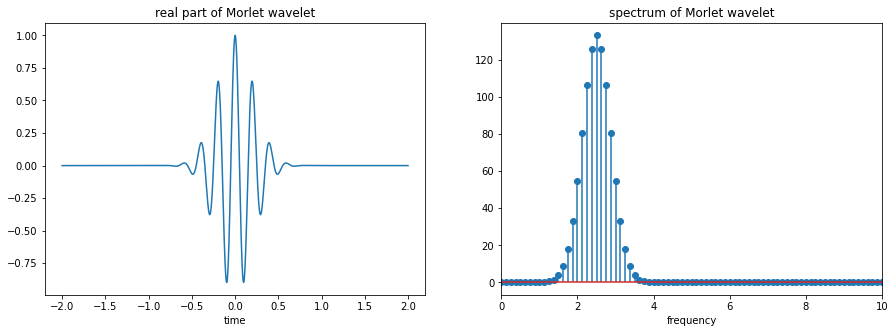

In [8]:
fig,ax = plt.subplots(1,2,figsize = (15,5))

ax[0].plot(time, wavelet)
ax[0].set_xlabel('time')
ax[0].set_title('real part of Morlet wavelet')


# Spectrum describes how the intensity of a time-varying signal is distributed in the frequency domain.

ax[1].stem(hz, spectrum , use_line_collection=True)
ax[1].set_xlabel('frequency')
ax[1].set_title('spectrum of Morlet wavelet')
ax[1].set_xlim([0,10])


# **Complex Morlet Wavelet**

In [9]:
def complex_wavelet(time, freq, fwhm):
  expPart1 = np.exp(1j *2* np.pi * freq * time)
  expPart2 = np.exp((-4 * np.log(2) * time ** 2)/(fwhm**2))
  return expPart1 * expPart2

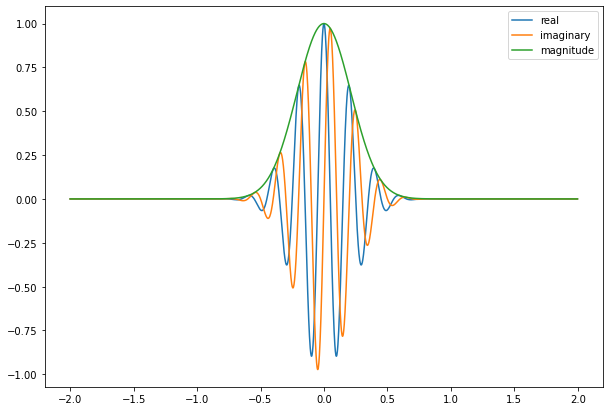

In [10]:
wavelet = complex_wavelet(time,freq,fwhm)
plt.figure(figsize = (10,7))
plt.plot(time,np.real(wavelet), label= 'real')
plt.plot(time,np.imag(wavelet), label = 'imaginary')
plt.plot(time, np.abs(wavelet), label= 'magnitude')
plt.legend()

# **Create a wavelet family**

**We will be creating a family of wavelets which are stored in a marix**

In [11]:
# define parameters

lowFreq  = 2
highFreq = 80
numFreq  = 42

frex = np.linspace(lowFreq, highFreq, numFreq)
fwhm = np.linspace(1,1,numFreq)

In [12]:
waveletFamily = np.zeros((numFreq, len(time)), dtype = complex) # we should define that the data type can be complex so we can 
# add complex values in the for loop

for wi in range(numFreq):
  waveletFamily[wi, :] = complex_wavelet(time, frex[wi], fwhm[wi])



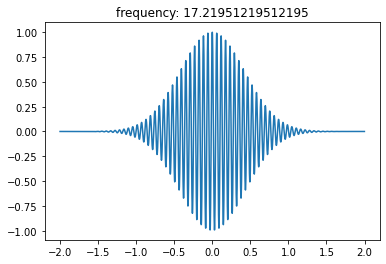

In [13]:
plt.plot(time, np.real(waveletFamily[8,:])) # as you increase the wi value, you will get the higher frequency signals
plt.title(f"frequency: {frex[8]}")
plt.show()

***Turn the wavelet into images***

Text(0.5, 1.0, 'magnitude part of Morlet wavelet')

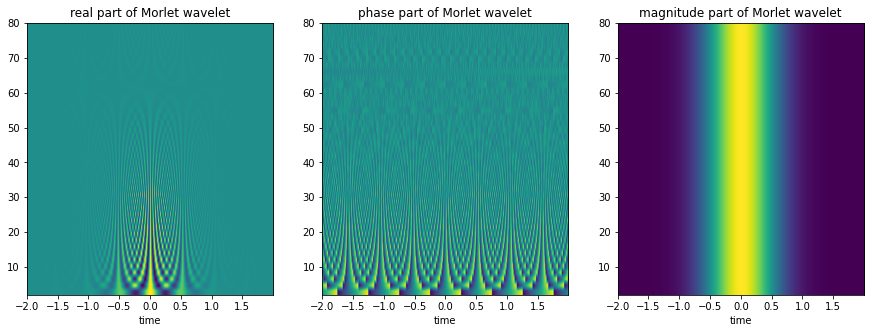

In [14]:
fig,ax = plt.subplots(1,3,figsize = (15,5))

# aspect: automatically fits the image size
# origin: flips the image 
# time[0] , time[-1] >> (-2.0, 1.998)

ax[0].imshow(np.real(waveletFamily), aspect='auto', origin='lower', 
             extent = [time[0], time[-1], lowFreq, highFreq])
ax[0].set_xlabel('time')
ax[0].set_title('real part of Morlet wavelet')


ax[1].imshow(np.angle(waveletFamily), aspect='auto', origin='lower', 
             extent = [time[0], time[-1], lowFreq, highFreq])
ax[1].set_xlabel('time')
ax[1].set_title('phase part of Morlet wavelet')

ax[2].imshow(np.abs(waveletFamily), aspect='auto', origin='lower', 
             extent = [time[0], time[-1], lowFreq, highFreq])
ax[2].set_xlabel('time')
ax[2].set_title('magnitude part of Morlet wavelet')

# **Import and visualize EEG data**

In [15]:
from google.colab import files
upload = files.upload()

Saving sampleEEGdata.mat to sampleEEGdata.mat


In [16]:
from scipy.io import loadmat
EEG = loadmat('sampleEEGdata.mat')

In [17]:
times = np.squeeze(EEG['EEG'][0][0][14])
data = EEG['EEG'][0][0][15]
fs = EEG['EEG'][0][0][11][0][0].astype(int) # sampling rate

In [18]:
print(fs)
print(np.shape(times))
print(np.shape(data))

256
(640,)
(64, 640, 99)


In [19]:
data[46,:,:].shape

(640, 99)

(640,)

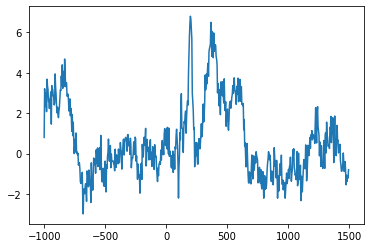

In [20]:
erp = np.mean(data[46,:,:], axis=1)
plt.plot(times, erp)
erp.shape

# **Wavelet Convolution**

## **EEG wavelet**

In [21]:
# define parameters

lowFreq  = 2
highFreq = 30
numFreq  = 42
time = np.arange(-fs, fs+1)/fs # time vector between -1 and +1

frex = np.linspace(lowFreq, highFreq, numFreq)
fwhm = np.linspace(1,5,numFreq)

In [23]:
waveletFamily = np.zeros((numFreq, len(time)), dtype = complex) # we should define that the data type can be complex so we can 
# add complex values in the for loop

for wi in range(numFreq):
  waveletFamily[wi, :] = complex_wavelet(time, frex[wi], fwhm[wi])



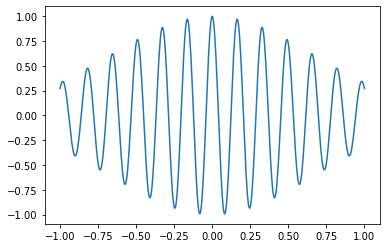

In [24]:
plt.plot(time,np.real(waveletFamily[6,:]))

## **Convolution**

In [25]:
covolv = np.convolve(erp, waveletFamily[0,:], mode='same')

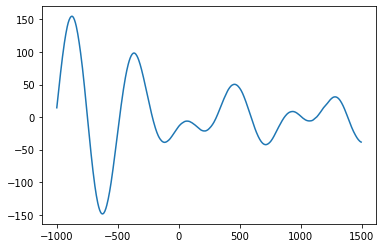

In [28]:
plt.plot(times, np.real(covolv))

# **Scalogram**

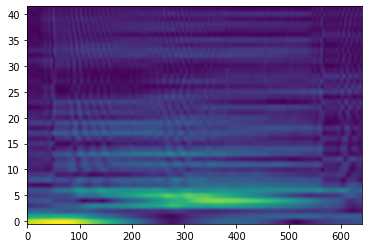

In [35]:
# initialize a matrix

scalogram = np.zeros((numFreq, len(times)))

# loop over frequencies to implement convolution

for wi in range(numFreq):
  waveletFamily[wi, :] = complex_wavelet(time, frex[wi], fwhm[wi])
  convolv = np.convolve(erp, waveletFamily[wi,:], mode='same')
  scalogram[wi,:] = np.abs(convolv)

# Create scalogram
plt.imshow(scalogram, origin='lower', aspect='auto')
plt.show()


